In [1]:
%matplotlib notebook


Bad key "text.kerning_factor" on line 4 in
C:\Users\Agata\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt

In [3]:
from wczytywanie_i_blinki_mne_numpy import wczytaj, detektor_bs

In [4]:
path = 'sub-ARZ000_task_art_watch1_run-01.vhdr'
signal_from_mne = wczytaj(path)
ica = detektor_bs(signal_from_mne, "mne_lib")

Extracting parameters from sub-ARZ000_task_art_watch1_run-01.vhdr...
Setting channel info structure...
Reading 0 ... 298719  =      0.000 ...   298.719 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done   8 out of  19 | elapsed:   13.7s remaining:   18.9s
[Parallel(n_jobs=16)]: Done  12 out of  19 | elapsed:   14.6s remaining:    8.5s
[Parallel(n_jobs=16)]: Done  16 out of  19 | elapsed:   15.7s remaining:    2.9s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 271 samples (0.271 sec)



[Parallel(n_jobs=16)]: Done  19 out of  19 | elapsed:   16.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   8 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  19 | elapsed:    0.1s remaining:    0.0s


Analiza z wykorzystaniem biblioteki mne
Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=16)]: Done  16 out of  19 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  19 out of  19 | elapsed:    0.1s finished
C:\Users\Agata\anaconda3\lib\site-packages\mne\utils\check.py:90: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\Agata\anaconda3\lib\site-packages\mne\utils\check.py:90: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
F:\Studia\Zespołowy_projekt_studencki\repo\gamma-oscilation-during-saccades\wczytywanie_i_blinki_mne_numpy.py:177: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = ICA(n_components=n_components, method=method, random_sta

Selecting by number: 19 components
Fitting ICA took 2.4s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


<RawBrainVision | sub-ARZ000_task_art_watch1_run-01.eeg, 19 x 298720 (298.7 s), ~43.4 MB, data loaded>


<IPython.core.display.Javascript object>


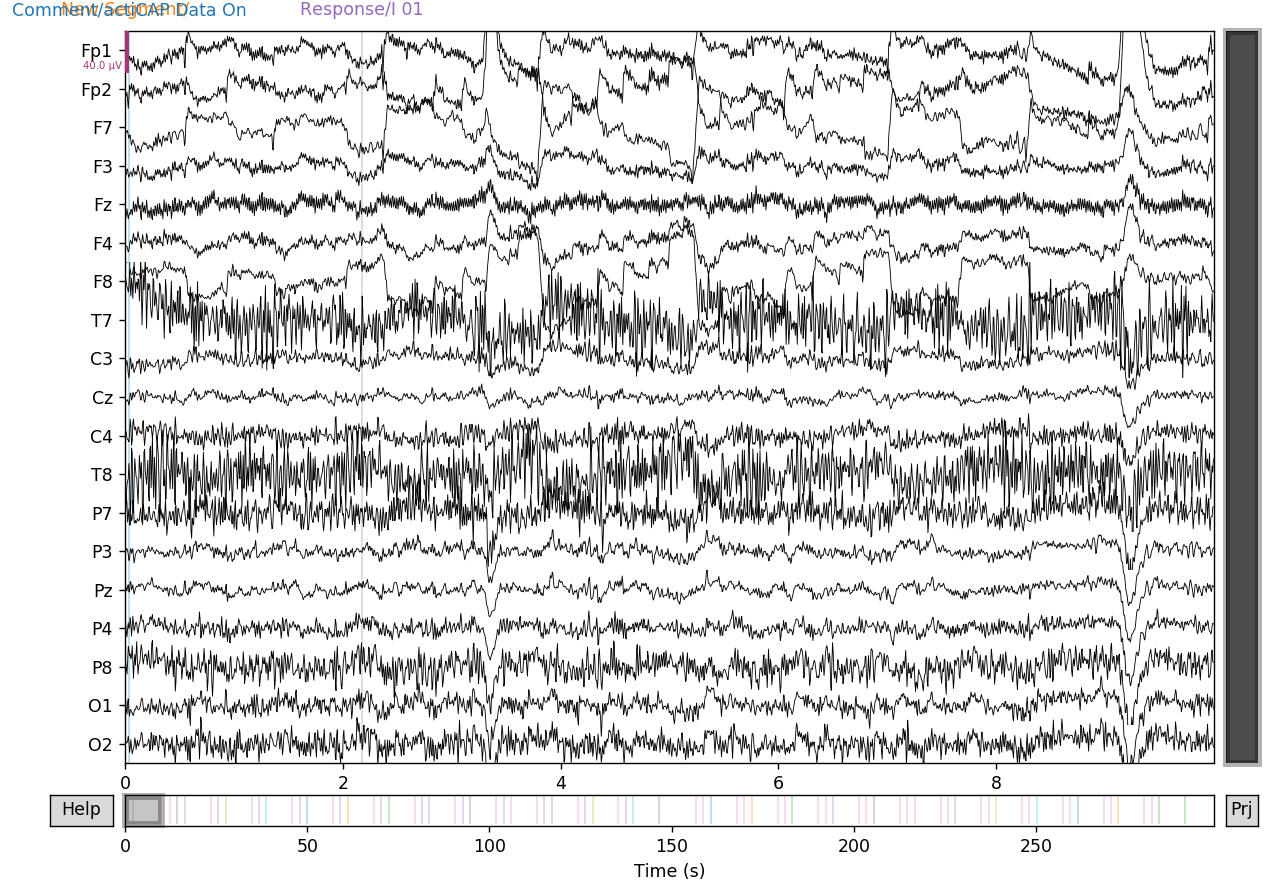

<IPython.core.display.Javascript object>


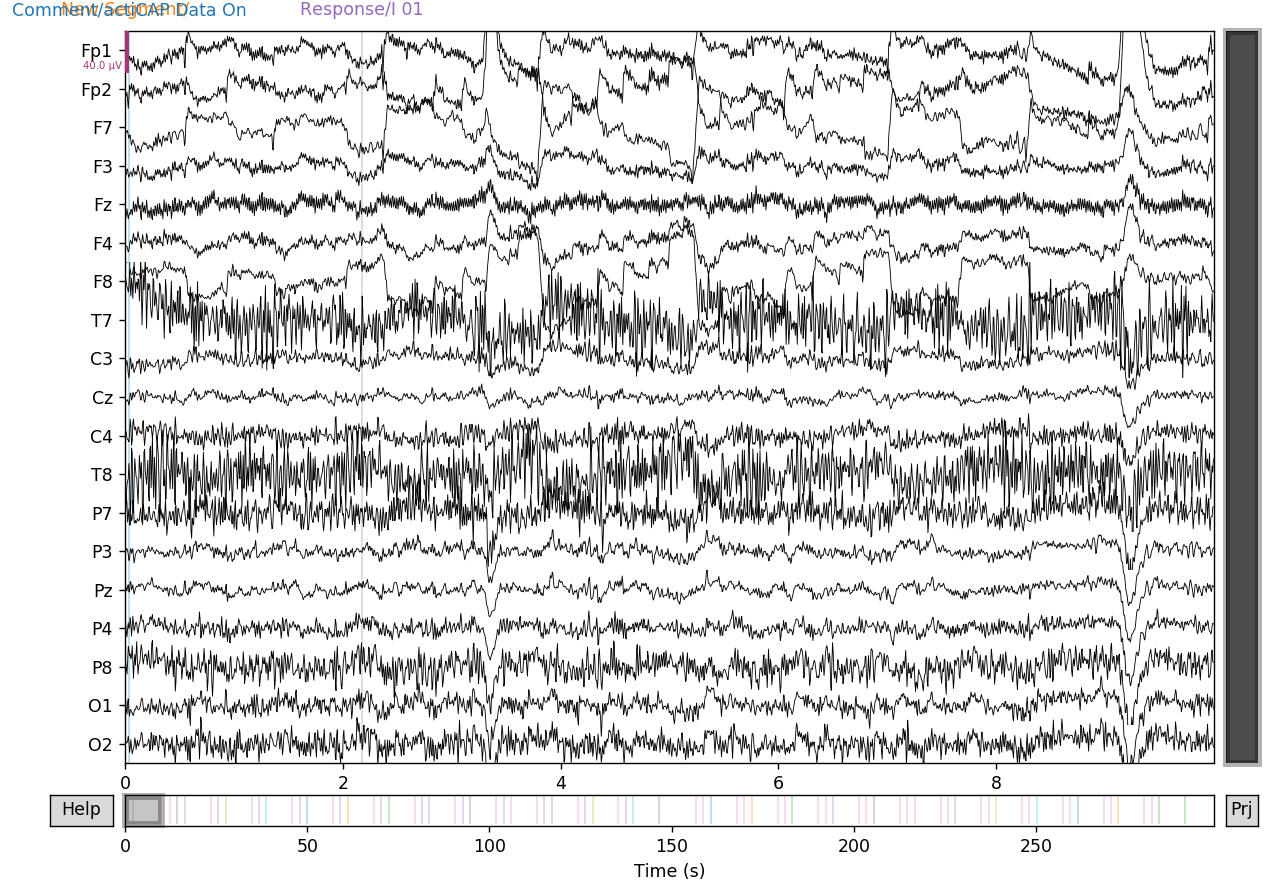

In [5]:
print(signal_from_mne)
signal_from_mne.plot()

In [6]:
Fs = signal_from_mne.info['sfreq']
t_vec = signal_from_mne.times

In [7]:
df = signal_from_mne.annotations.to_data_frame()
print(df)
# print(df.loc[df.description.str.contains("/M")])

                        onset  duration              description
0  2021-12-17 18:16:42.712058     0.001             New Segment/
1  2021-12-17 18:16:42.752058     0.001  Comment/actiCAP Data On
2  2021-12-17 18:16:44.890058     0.001            Response/I 01
3  2021-12-17 18:16:55.031058     0.001            Response/M 33
4  2021-12-17 18:16:57.082058     0.001         Response/T 01 32
..                        ...       ...                      ...
72 2021-12-17 18:21:15.264058     0.001           Response/P 211
73 2021-12-17 18:21:22.370058     0.001            Response/M 33
74 2021-12-17 18:21:24.405058     0.001            Response/T 02
75 2021-12-17 18:21:26.440058     0.001           Response/P 212
76 2021-12-17 18:21:33.479058     0.001            Response/E 00

[77 rows x 3 columns]


In [8]:
def get_min_diff(sig, idx_to_diff):
    #idx_to_diff = 0.2*Fs
    diff_sig = np.abs(sig[:-idx_to_diff] - sig[idx_to_diff:])
    return np.quantile(diff_sig, 0.67)

def get_max_diff(sig, idx_to_diff):
    diff_sig = np.abs(sig[:-idx_to_diff] - sig[idx_to_diff:])
    return np.quantile(diff_sig, 0.955)

def moving_average(signal, len_single_avrg, overlap=1, extend=True):
    '''
    signal - zapis sygnału
    len_single_avrg - długość w liczbie próbek z jakiego okresu liczona jest średnia
    overlap - liczba nakładający się próbek sygnału
    Funkcja zwraca wektor średnich dla len_single_avrg liczby próbek wstecz

    '''
    sig_len = len(signal)
    samples_to_avrg = int(len_single_avrg - overlap)
    mov_avrgs_len = int(round(sig_len / samples_to_avrg))

    mov_avrgs = np.zeros(sig_len)
    mov_avrgs[:len_single_avrg] = np.mean(signal[:len_single_avrg])

    
    for i in range(samples_to_avrg, sig_len - len_single_avrg, samples_to_avrg):
        mov_avrgs[i: i + len_single_avrg] = np.mean(signal[i: i + len_single_avrg])
        

    for i in range(len_single_avrg, 0, -1):
        mov_avrgs[-i:i] = np.mean(signal[-i:])



    return mov_avrgs


def find_saccades(sig, mov_avrg, Fs, min_diff = 25, max_diff = 80):
    '''
    signal - zapis sygnału
    sig_mov_avrgs - wektor średnich rozszerzonych na długość całego sygnału

    '''
    step = int(0.02*Fs) # bo minimalna długość sakkady

    avg_len = int(0.4*Fs)
    mov_avg =  moving_average(sig, avg_len)
    mov_avg_diff = sig - mov_avg
    beg_idx = np.where(np.abs(mov_avg_diff) > min_diff)[0]
    
    new_ma = moving_average(sig, step, 1)
    new_ma_diff = np.diff(new_ma)
    
    diff = np.diff(sig)
    
    sacc_idx = []
    new_idx = []
    final_saccades = []
    temp_points = []
    for i in range(sig.shape[0]//avg_len + 1):
        sacc = np.intersect1d(beg_idx[beg_idx>i*avg_len], beg_idx[beg_idx<(i+1)*avg_len])
        ma_diff = mov_avg[sacc] - sig[sacc]
        
        
        if np.any(ma_diff < 0) and np.any(ma_diff > 0):
            
            new_point = int(np.median(sacc))
            
            # w otoczeniu 0.2 s znajdź, gdzie pochodna jest nawiększa i wybierz ten punkt
            t_range = int(0.2 * Fs)

            if new_point - t_range < 0:
                new_point = np.argmax(np.abs(diff[:new_point+t_range]))
            
            elif new_point >= len(diff) - t_range:
                new_point = np.argmax(np.abs(diff[new_point-t_range:])) + new_point-t_range
                
            else:
                new_point = np.argmax(np.abs(diff[new_point-t_range:new_point+t_range])) + new_point-t_range
                
            
            temp_points.append(new_point)

#             znak = new_ma[new_point]/np.abs(new_ma[new_point])

#             sacc_snake = new_ma_diff * znak >= 0

#             s_i = 1
#             while True or new_point+s_i < sacc_snake.shape[0]:
#                 if sacc_snake[new_point+s_i]:
#                     final_saccades.append(new_point+s_i)

#                 else:
#                     break
#                 s_i += 1

#             s_i = 0
#             while True:
#                 if sacc_snake[new_point+s_i]:
#                     final_saccades.append(new_point+s_i)
#                 else:
#                     break
#                 s_i -= 1


#             new_idx.append(new_point)

        if np.abs(mov_avg[i*avg_len] - mov_avg[i*avg_len - step]) > max_diff:
            new_point = int(i*avg_len - step)
            t_range = int(0.1 * Fs)

            if new_point - t_range < 0:
                new_point = np.argmax(np.abs(diff[:new_point+t_range]))
            
            elif new_point >= len(diff) - t_range:
                new_point = np.argmax(np.abs(diff[new_point-t_range:])) + new_point-t_range
                
            else:
                new_point = np.argmax(np.abs(diff[new_point-t_range:new_point+t_range])) + new_point-t_range
                
            
            temp_points.append(new_point)
            temp_points.append(new_point)
            
    for p in temp_points:
#         if new_ma_diff[p] == 0:
        new_p = np.argmax(np.abs(new_ma_diff[p-step:p+step])) + (p - step)   
        znak = new_ma_diff[new_p]/np.abs([new_p])


#         else:
#             znak = new_ma[p]/np.abs(new_ma[p])
        
        sacc_snake = new_ma_diff * znak
        sacc_snake[sacc_snake>0] = 1
        sacc_snake[sacc_snake<0] = -1

        s_i = 1
        while True:
            if p+s_i > sacc_snake.shape[0] - 1:
                break
            elif sacc_snake[p+s_i] >=0:
                final_saccades.append(p+s_i)

            else:
                break
                
            s_i += 1

        s_i = 0
        while True or p-s_i > 0:
            if p+s_i == 0:
                break
            elif sacc_snake[p+s_i] >=0:
                final_saccades.append(p+s_i)
            else:
                break
            s_i -= 1


#         new_idx.append(new_point)
        
    
    final_saccades.sort()
    final_saccades = list(set(final_saccades))
    final_saccades = np.array(final_saccades)
    
    diff_break_sacc = np.diff(final_saccades)
    where_break = np.where(diff_break_sacc > 1)[0]
#     print(where_break)
    to_add = 0
    threshold = 30
    for i, pp in enumerate(where_break):
        bp = pp + to_add
        if diff_break_sacc[pp] <= threshold:
#             print("różnice", diff_break_sacc[pp], diff_break_sacc[pp+1], diff_break_sacc[pp-1])
#             print(final_saccades[bp], final_saccades[bp+1])
            temp_scc = final_saccades[bp+1]
            j = 1
            while final_saccades[bp] + j < temp_scc:
#                 print("dodano", final_saccades[bp]+j)
                final_saccades = np.insert(final_saccades, bp+j, final_saccades[bp]+j)
                j += 1
                to_add += 1
    
    
    where_break = np.where(np.diff(final_saccades) >= threshold)[0]
    sig_std = np.std(sig) * 0.08
#     print(sig_std, final_saccades.shape, where_break)
    
    deleted = 0
    for i, bp in enumerate(where_break):
        if i == 0:
            if np.abs(sig[final_saccades[0]] - sig[bp]) < sig_std:
                final_saccades = np.delete(final_saccades, (0, bp))
                deleted += bp
        elif i == where_break.shape[0] - 1:
            pass
        else:

            if np.abs(sig[where_break[i-1]] - sig[bp]) < sig_std:
#                 print("usu", np.abs(sig[where_break[i-1]] - sig[bp]), where_break[i-1], bp)
                range_to_del = np.arange(where_break[i-1], bp) - deleted
                final_saccades = np.delete(final_saccades, range_to_del)
                deleted += range_to_del.shape[0]
                
#     print(final_saccades.shape)
        

    return new_ma, final_saccades




In [9]:
import copy
class Epoch:
    def __init__(self, event_prop):
        self._idx = event_prop["event_idx"]
        self._onset = event_prop["onset"]
        self._duration = event_prop["duration"]
        self._series = event_prop["series"]
        self._img_no = event_prop["image_number"]
        self._st_idx = None
        self._end_idx = None
        self._sig = None
        self._t = None
        self._saccades_idx = None
        
    def __str__(self):
        return self._series + self._img_no
    
    def __repr__(self):
        return self._series + self._img_no
        
    def get_epoch_signal(self, sig_mne):
        #TODO Czy tu dajemy zrekonstruowany sygnał czy oryginalny
        Fs = sig_mne.info['sfreq']
        self._st_idx = sig_mne.time_as_index(self._onset)[0]
        self._end_idx = self._st_idx + int(self._duration*Fs)
        self._sig = sig_mne[:,self._st_idx:self._end_idx][0]
        self._t = sig_mne.times[self._st_idx:self._end_idx]
    
    @property
    def signal(self):
        return self._sig
    
    @property
    def saccades_idx(self):
        return copy.copy(self._saccades_idx)

    def plot(self):
        n = self._sig.shape[0]
        fig, axs = plt.subplots(4, 5, figsize=(20,25))
        for i in range(n):
            axs[i//5, i%5].plot(self._t, self._sig[i,:])
        #uładnić
        #plt.savefig()
        plt.show()
        
    def find_saccades(self, ica):
        sacc_sig = ica[1, self._st_idx:self._end_idx][0][0]
        
        len_single_avrg = int(.3*Fs)
        overlap = int(.02*Fs)
        idx_to_diff = int(0.2 * Fs)
        saccades = []
        sigFp = sacc_sig

        mov_avrg = moving_average(sigFp, len_single_avrg , overlap)
        min_dff = get_min_diff(sigFp, idx_to_diff)
        max_dff = get_max_diff(sigFp, idx_to_diff)
        ma, self._saccades_idx = find_saccades(sigFp, mov_avrg, Fs, min_dff, max_dff)
        
        fig, ax = plt.subplots(figsize=(8,4))
        
        ax.plot(self._t, sacc_sig)
        ax.plot(self._t, ma)
#         ax.plot(self._t[:-1], dff)
        ax.plot(self._t[self._saccades_idx], sacc_sig[self._saccades_idx], 'o')
        ax.set_title(self._series + self._img_no)
        plt.show()
        return sacc_sig, self._saccades_idx

class ExtractEventInfo:
    def __init__(self, start_time, end_time):
        self._start_t = start_time
        self._end_t = end_time
        self._previous_event_t = end_time
        
    def __call__(self, index, row):
        t = row.onset - self._start_t
        duration = self._previous_event_t - row.onset
        self._previous_event_t = row.onset
        img_descrp = row.description.partition("/P ")[-1]
        img_series, img_no = [img_descrp[0], img_descrp[1:]]
        props = self._to_dict(index,
                              t.total_seconds(), duration.total_seconds(), 
                              img_series, img_no)
        return props
    
    def _to_dict(self, *args):
        _DICT_PROPS = ["event_idx", "onset", "duration", "series", "image_number"]
        props_dict = {}
        for key, value in zip(_DICT_PROPS, args):
            props_dict[key] = value
        return props_dict
        

def epochs_factory(df, sig_from_mne):
    
    start_time = df.onset[0]
    end_time = df.onset.iloc[-1]
    epoch_list = []
    extractor = ExtractEventInfo(start_time, end_time)
    img_events = df.loc[df.description.str.contains("/P")]
    for idx, row in img_events.reindex().sort_index(ascending=False).iterrows():
        e = Epoch(extractor(idx, row))
        e.get_epoch_signal(sig_from_mne)
#         e.find_saccades(ica)
#         e.plot()
        epoch_list.append(e)
    
         #TODO
        
        
        
    return epoch_list
 
    
    


In [10]:
epoch_list = epochs_factory(df, signal_from_mne)

<IPython.core.display.Javascript object>


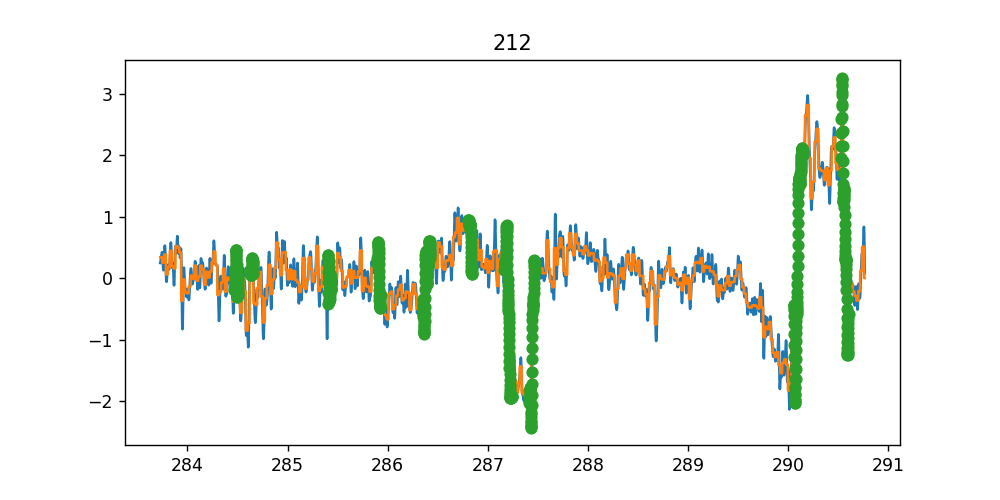

In [11]:
for e in epoch_list[:1]:
    s = e.find_saccades(ica)


<IPython.core.display.Javascript object>


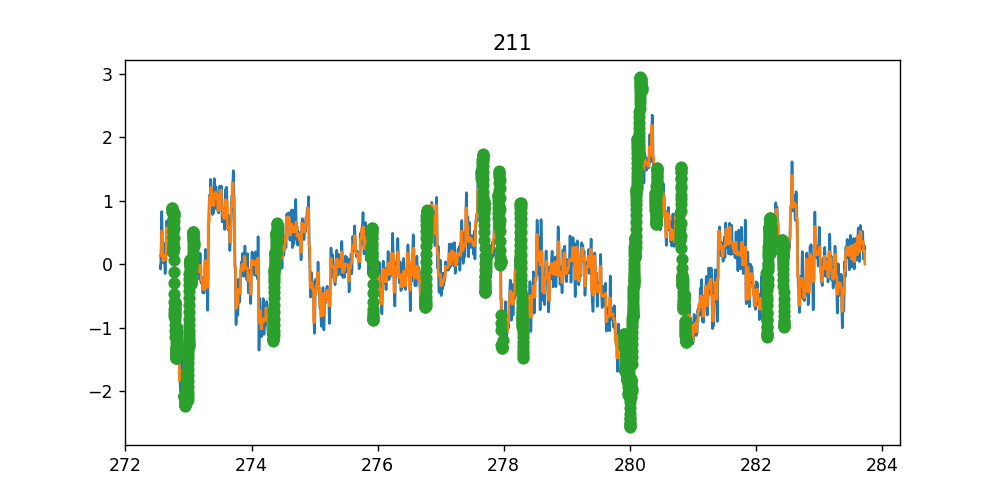

In [12]:
e = epoch_list[1]
s = e.find_saccades(ica)